In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
plt.style.use("fivethirtyeight")
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from pandas.tseries.offsets import BDay

In [38]:
# E-Commerce
SHOP = pd.read_csv('./Data_II/E-Commerce/SHOP.csv')
ETSY = pd.read_csv('./Data_II/E-Commerce/ETSY.csv')
WIX = pd.read_csv('./Data_II/E-Commerce/WIX.csv')
GDDY = pd.read_csv('./Data_II/E-Commerce/GDDY.csv')

# Food
KR = pd.read_csv('./Data_II/Food/KR.csv')
MCD = pd.read_csv('./Data_II/Food/MCD.csv')
CMG = pd.read_csv('./Data_II/Food/CMG.csv')
SBUX = pd.read_csv('./Data_II/Food/SBUX.csv')

# Retail
BBY = pd.read_csv('./Data_II/Retail/BBY.csv')
HD = pd.read_csv('./Data_II/Retail/HD.csv')
WMT = pd.read_csv('./Data_II/Retail/WMT.csv')
TGT = pd.read_csv('./Data_II/Retail/TGT.csv')

# Finance
C = pd.read_csv('./Data_II/Finance/C.csv')
GDOT = pd.read_csv('./Data_II/Finance/GDOT.csv')
JPM = pd.read_csv('./Data_II/Finance/JPM.csv')
PYPL = pd.read_csv('./Data_II/Finance/PYPL.csv')

# S&P 500
SP500 = pd.read_csv('./Data_II/^GSPC.csv')

TGT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-11,71.529999,72.750000,70.510002,72.419998,61.835979,6369700
1,2016-01-12,72.970001,73.550003,72.629997,73.360001,62.638607,4851100
2,2016-01-13,73.290001,73.750000,71.550003,71.639999,61.169975,5963500
3,2016-01-14,71.620003,71.639999,70.000000,70.410004,60.119747,6283200
4,2016-01-15,68.830002,70.589996,68.830002,70.080002,59.837971,7435800


# Data Cleansing

In [47]:
# E-Commerce
columns_to_keep = ['Date', 'Close', 'Volume']
SHOP = SHOP[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
ETSY = ETSY[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
WIX = WIX[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
GDDY = GDDY[columns_to_keep]


# Food
columns_to_keep = ['Date', 'Close', 'Volume']
KR = KR[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
MCD = MCD[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
CMG = CMG[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
SBUX = SBUX[columns_to_keep]


# Retail
columns_to_keep = ['Date', 'Close', 'Volume']
BBY = BBY[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
HD = HD[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
WMT = WMT[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
TGT = TGT[columns_to_keep]


# Finance
columns_to_keep = ['Date', 'Close', 'Volume']
C = C[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
GDOT = GDOT[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
JPM = JPM[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
PYPL = PYPL[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
SP500 = SP500[columns_to_keep]

SBUX.head()

,Date,Close,Volume
0,2016-01-11,57.820000,10757300
1,2016-01-12,59.459999,12375800
2,2016-01-13,57.869999,11303600
3,2016-01-14,58.980000,11444100
4,2016-01-15,58.000000,15246100


In [56]:
stock_close = SHOP[['Date','Close']].merge(ETSY[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY']

stock_close = stock_close.merge(WIX[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX']

stock_close = stock_close.merge(GDDY[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY']

stock_close = stock_close.merge(KR[['Date','Close']])
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR']

stock_close = stock_close.merge(MCD[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD']

stock_close = stock_close.merge(CMG[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG']

stock_close = stock_close.merge(SBUX[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX']

stock_close = stock_close.merge(BBY[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY']

stock_close = stock_close.merge(HD[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD']

stock_close = stock_close.merge(TGT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT']

stock_close = stock_close.merge(WMT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT']

# # E-Commerce DF
# e_com = SHOP[['Date','Close']].merge(ETSY[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY']
# e_com = e_com.merge(WIX[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX']
# e_com = e_com.merge(GDDY[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY']
# e_com = e_com.merge(SP500[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'SP500']

# # Food DF
# food = KR[['Date','Close']].merge(MCD[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD']
# food = food.merge(CMG[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD', 'CMG']
# food = food.merge(SBUX[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD', 'CMG', 'SBUX']
# food = food.merge(SP500[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD', 'CMG', 'SBUX', 'SP500']

# # Retail DF
# # retail = BBY[['Date','Close']].merge(HD[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD']
# # retail = retail.merge(WMT[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD', 'WMT']
# # retail = retail.merge(TGT[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD', 'WMT','TGT']
# # retail = retail.merge(SP500[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD', 'WMT','TGT', 'SP500']

# retail = BBY[['Date', 'Close']].merge(HD[['Date', 'Close']], on='Date')
# retail.columns = ['Date', 'BBY', 'HD']

# retail = retail.merge(WMT[['Date', 'Close']], on='Date')
# retail.columns = ['Date', 'BBY', 'HD', 'WMT']

# # Finance DF
# finance=C[['Date', 'Close']].merge(GDOT[['Date', 'Close']], on='Date')
# finance.columns=['Date', 'C', 'GDOT']
# finance=finance.merge(JPM[['Date', 'Close']], on='Date')
# finance.columns=['Date', 'C', 'GDOT', 'JPM']
# finance=finance.merge(PYPL[['Date', 'Close']], on='Date')
# finance.columns=['Date', 'C', 'GDOT', 'JPM', 'PYPL']
# finance = finance.merge(SP500[['Date','Close']], on='Date')
# finance.columns = ['Date', 'C', 'GDOT', 'JPM', 'PYPL', 'SP500']

stock_close.head()

,Date,SHOP,ETSY,WIX,GDDY,KR,MCD,CMG,SBUX,BBY,HD,TGT,WMT


# Line Chart Comparison

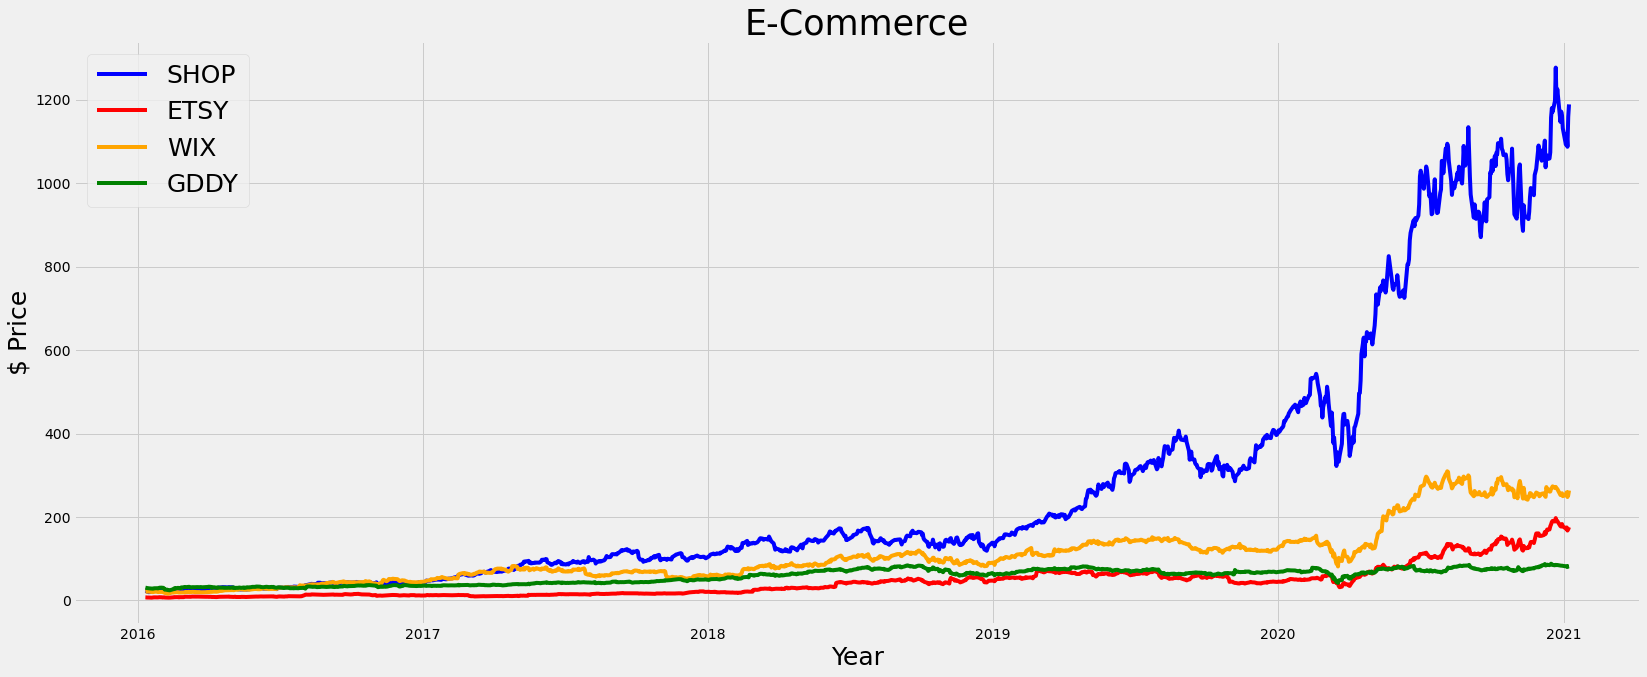

In [6]:
mpl.rcParams['figure.figsize']=(25,10)
e_com['Date']=pd.to_datetime(e_com['Date'])
e_com.set_index('Date',inplace=True)
plt.plot('SHOP', color='blue', data=e_com, label='SHOP')
plt.plot('ETSY', color='red', data=e_com, label='ETSY')
plt.plot('WIX', color='orange', data=e_com, label='WIX')
plt.plot('GDDY', color='green', data=e_com, label='GDDY')
plt.legend(loc='upper left', fontsize='25')
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('E-Commerce', fontsize=35)
# plt.figure(figsize=(20,20))
plt.show()

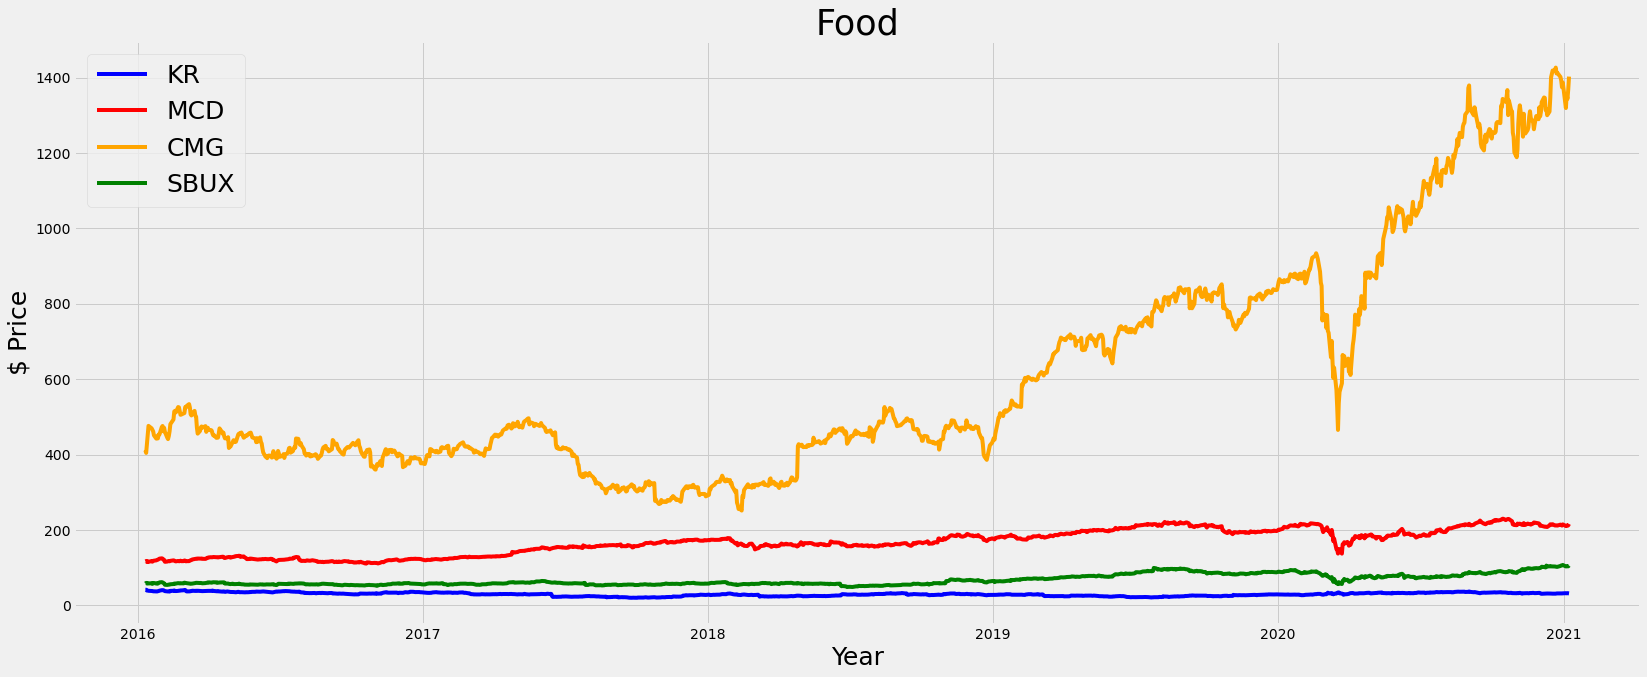

In [7]:
food['Date']=pd.to_datetime(food['Date'])
food.set_index('Date',inplace=True)
plt.plot('KR', color='blue', data=food, label='KR')
plt.plot('MCD', color='red', data=food, label='MCD')
plt.plot('CMG', color='orange', data=food, label='CMG')
plt.plot('SBUX', color='green', data=food, label='SBUX')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Food', fontsize=35)
plt.show()

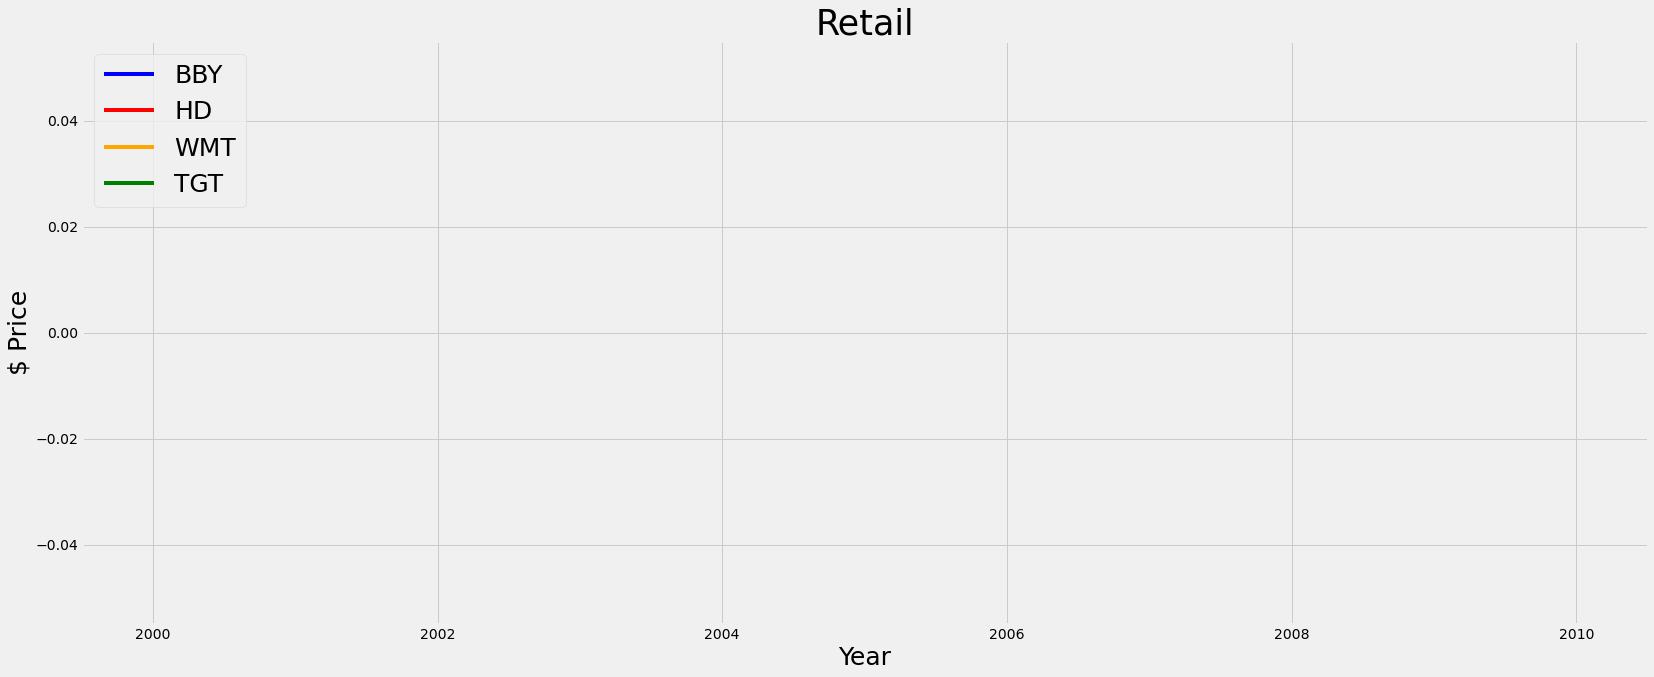

In [8]:
# retail['Date']=pd.to_datetime(retail['Date'])
# retail.set_index('Date',inplace=True)
# plt.plot('BBY', color='blue', data=retail, label='BBY')
# plt.plot('HD', color='red', data=retail, label='HD')
# plt.plot('WMT', color='orange', data=retail, label='WMT')
# plt.plot('TGT', color='green', data=retail, label='TGT')
# plt.legend(loc='upper left', fontsize=25)
# plt.xlabel("Year", fontsize=25)
# plt.ylabel("$ Price", fontsize=25)
# plt.title('Retail', fontsize=35)
# plt.show()

retail['Date']=pd.to_datetime(retail['Date'])
retail.set_index('Date',inplace=True)
plt.plot('BBY', color='blue', data=retail, label='BBY')
plt.plot('HD', color='red', data=retail, label='HD')
plt.plot('WMT', color='orange', data=retail, label='WMT')
plt.plot('TGT', color='green', data=retail, label='TGT')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Retail', fontsize=35)
plt.show()

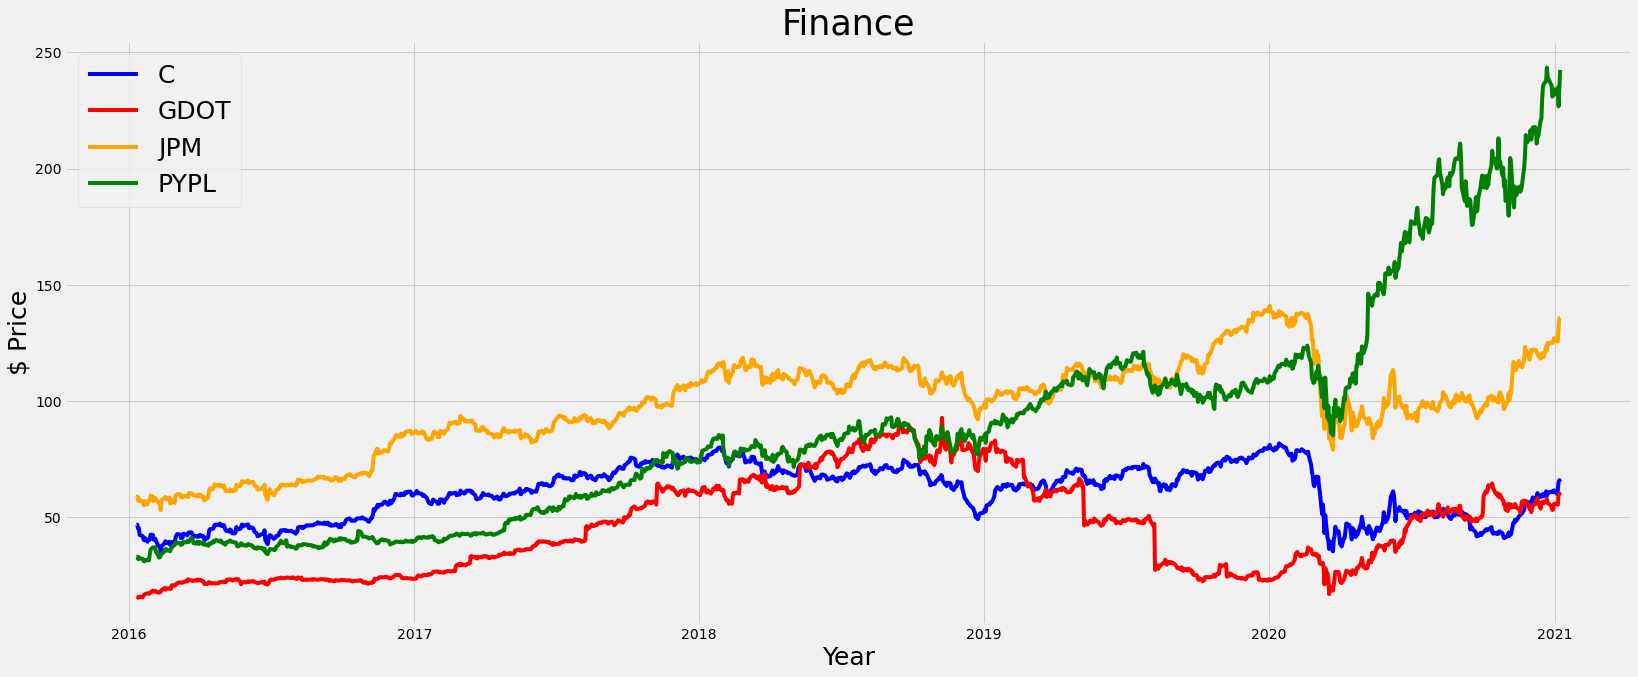

In [9]:
finance['Date']=pd.to_datetime(finance['Date'])
finance.set_index('Date',inplace=True)
plt.plot('C', color='blue', data=finance, label='C')
plt.plot('GDOT', color='red', data=finance, label='GDOT')
plt.plot('JPM', color='orange', data=finance, label='JPM')
plt.plot('PYPL', color='green', data=finance, label='PYPL')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Finance', fontsize=35)
plt.show()

# Stock Performance VS Benchmark

In [ ]:
listOfVariables = e_com.drop(['SP500'], axis=1).columns
print(listOfVariables)

In [ ]:
for i in listOfVariables:
    benchmark = e_com['SP500']
    ax = e_com[i].plot()
    ax2 = ax.twinx()
    ax2.plot(benchmark, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.grid(False)
    plt.tight_layout()
    plt.title("S&P 500 VS " + i)
    plt.show()
    


In [ ]:
listOfVariables = food.drop(['SP500'], axis=1).columns

for i in listOfVariables:
    benchmark = food['SP500']
    ax = food[i].plot()
    ax2 = ax.twinx()
    ax2.plot(benchmark, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.grid(False)
    plt.tight_layout()
    plt.title("S&P 500 VS " + i)
    plt.show()
    

In [ ]:
listOfVariables = retail.drop(['SP500'], axis=1).columns

for i in listOfVariables:
    benchmark = retail['SP500']
    ax = retail[i].plot()
    ax2 = ax.twinx()
    ax2.plot(benchmark, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.grid(False)
    plt.tight_layout()
    plt.title("S&P 500 VS " + i)
    plt.show()
    

In [ ]:
listOfVariables = finance.drop(['SP500'], axis=1).columns

for i in listOfVariables:
    benchmark = finance['SP500']
    ax = finance[i].plot()
    ax2 = ax.twinx()
    ax2.plot(benchmark, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.grid(False)
    plt.tight_layout()
    plt.title("S&P 500 VS " + i)
    plt.show()
    

# Moving Averages

In [ ]:
close_px = SHOP['Close']
SHOP['50_MA']=close_px.rolling(window=50).mean()
SHOP.head()

In [ ]:
SHOP['Date']=pd.to_datetime(HD['Date'])
SHOP.set_index('Date',inplace=True)
plt.plot('Close', data=SHOP, label='Closing Price')
plt.plot('50_MA', data=SHOP, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Shopify', fontsize=35)
plt.savefig('shop_50.jpg')
plt.show()

In [ ]:
close_px = ETSY['Close']
ETSY['50_MA']=close_px.rolling(window=50).mean()
ETSY['Date']=pd.to_datetime(HD['Date'])
ETSY.set_index('Date',inplace=True)
plt.plot('Close', data=ETSY, label='Closing Price')
plt.plot('50_MA', data=ETSY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('ETSY', fontsize=35)
plt.savefig('etsy_50.jpg')
plt.show()

In [ ]:
close_px = WIX['Close']
WIX['50_MA']=close_px.rolling(window=50).mean()
WIX['Date']=pd.to_datetime(HD['Date'])
WIX.set_index('Date',inplace=True)
plt.plot('Close', data=WIX, label='Closing Price')
plt.plot('50_MA', data=WIX, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('WIX', fontsize=35)
plt.savefig('wix_50.jpg')
plt.show()

In [ ]:
close_px = GDDY['Close']
GDDY['50_MA']=close_px.rolling(window=50).mean()
GDDY['Date']=pd.to_datetime(HD['Date'])
GDDY.set_index('Date',inplace=True)
plt.plot('Close', data=GDDY, label='Closing Price')
plt.plot('50_MA', data=GDDY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('GoDaddy', fontsize=35)
plt.savefig('gd_50.jpg')
plt.show()

In [ ]:
close_px = KR['Close']
KR['50_MA']=close_px.rolling(window=50).mean()
KR['Date']=pd.to_datetime(HD['Date'])
KR.set_index('Date',inplace=True)
plt.plot('Close', data=KR, label='Closing Price')
plt.plot('50_MA', data=KR, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Kroger', fontsize=35)
plt.savefig('kr_50.jpg')
plt.show()

In [ ]:
close_px = MCD['Close']
MCD['50_MA']=close_px.rolling(window=50).mean()
MCD['Date']=pd.to_datetime(HD['Date'])
MCD.set_index('Date',inplace=True)
plt.plot('Close', data=MCD, label='Closing Price')
plt.plot('50_MA', data=MCD, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('McDonalds', fontsize=35)
plt.savefig('mcd_50.jpg')
plt.show()

In [ ]:
close_px = CMG['Close']
CMG['50_MA']=close_px.rolling(window=50).mean()
CMG['Date']=pd.to_datetime(HD['Date'])
CMG.set_index('Date',inplace=True)
plt.plot('Close', data=CMG, label='Closing Price')
plt.plot('50_MA', data=CMG, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Chipotle', fontsize=35)
plt.savefig('cmg_50.jpg')
plt.show()

In [ ]:
close_px = SBUX['Close']
SBUX['50_MA']=close_px.rolling(window=50).mean()
SBUX['Date']=pd.to_datetime(HD['Date'])
SBUX.set_index('Date',inplace=True)
plt.plot('Close', data=SBUX, label='Closing Price')
plt.plot('50_MA', data=SBUX, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Starbucks', fontsize=35)
plt.savefig('sbux_50.jpg')
plt.show()

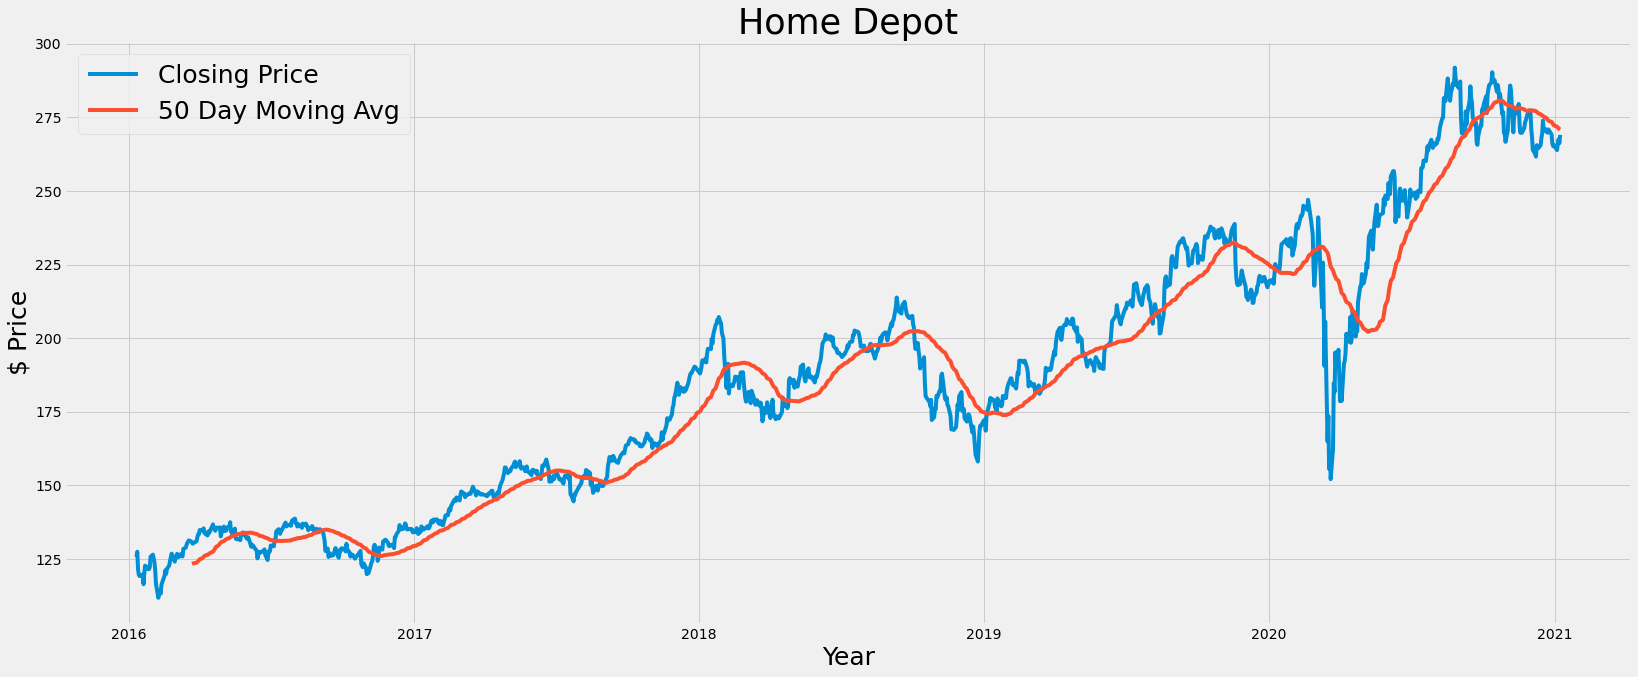

In [34]:
close_px = HD['Close']
HD['50_MA']=close_px.rolling(window=50).mean()
HD['Date']=pd.to_datetime(HD['Date'])
HD.set_index('Date',inplace=True)
plt.plot('Close', data=HD, label='Closing Price')
plt.plot('50_MA', data=HD, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Home Depot', fontsize=35)
plt.savefig('hd_50.jpg')
plt.show()

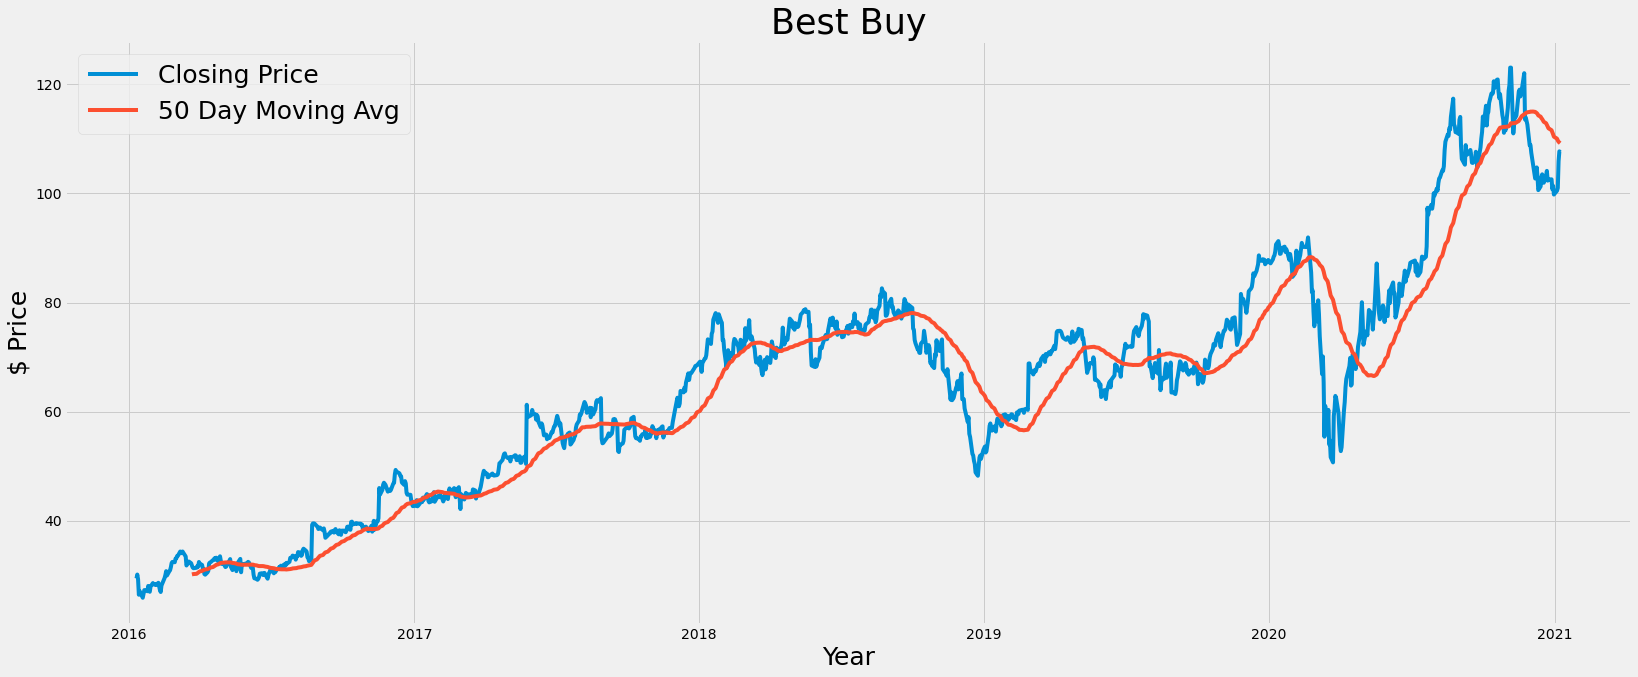

In [35]:
close_px = BBY['Close']
BBY['50_MA']=close_px.rolling(window=50).mean()
BBY['Date']=pd.to_datetime(BBY['Date'])
BBY.set_index('Date',inplace=True)
plt.plot('Close', data=BBY, label='Closing Price')
plt.plot('50_MA', data=BBY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Best Buy', fontsize=35)
plt.savefig('bby_50.jpg')
plt.show()

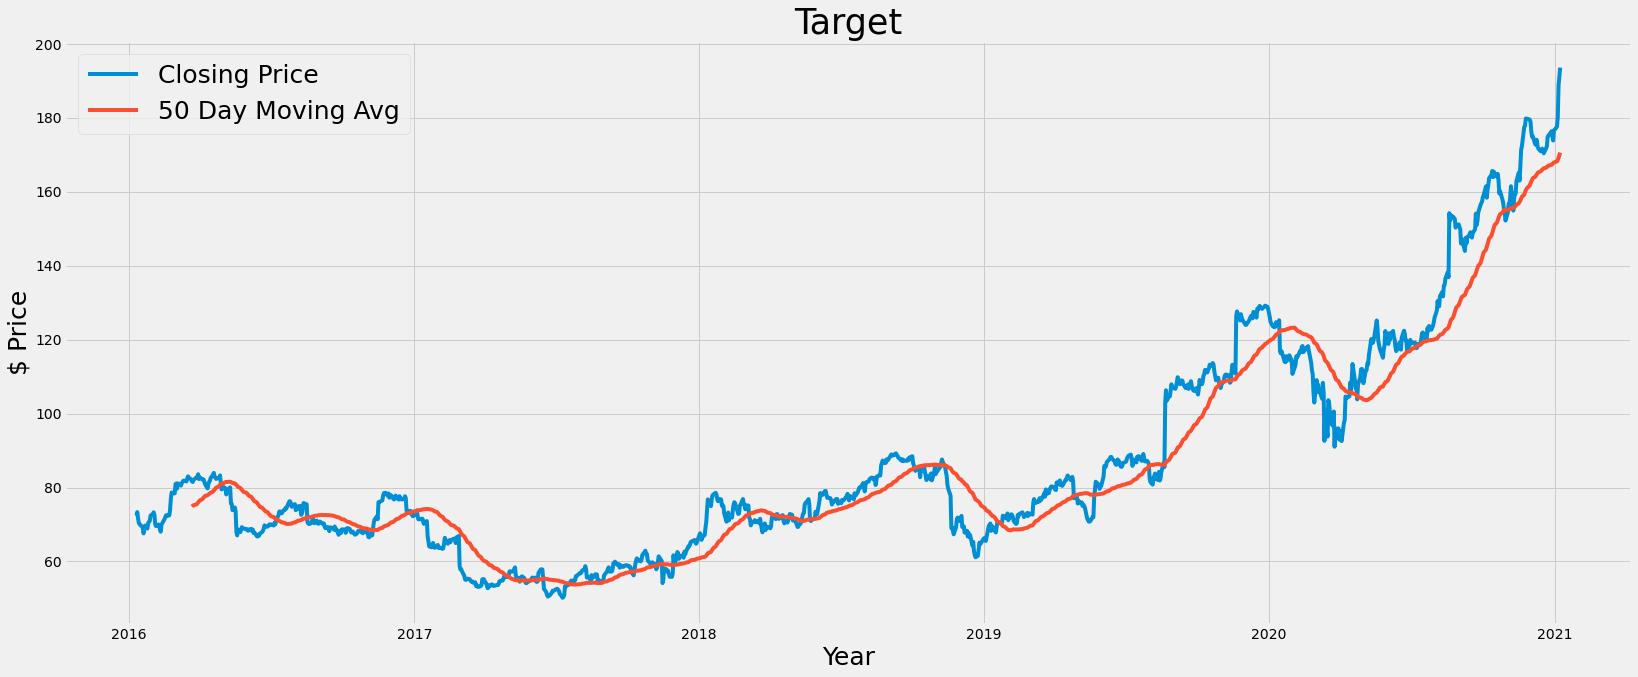

In [36]:
close_px = TGT['Close']
TGT['50_MA']=close_px.rolling(window=50).mean()
TGT['Date']=pd.to_datetime(TGT['Date'])
TGT.set_index('Date',inplace=True)
plt.plot('Close', data=TGT, label='Closing Price')
plt.plot('50_MA', data=TGT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Target', fontsize=35)
plt.savefig('tgt_50.jpg')
plt.show()

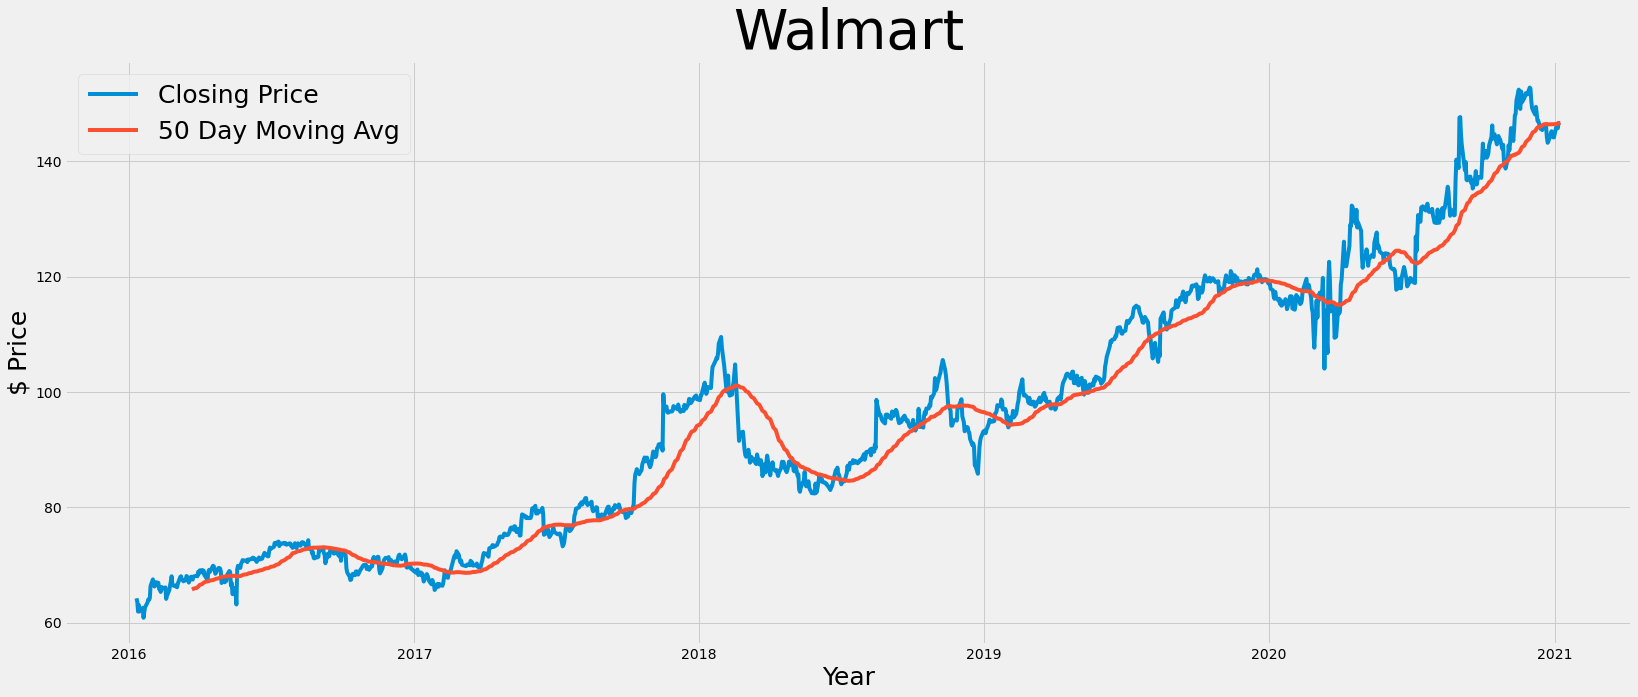

In [37]:
close_px = WMT['Close']
WMT['50_MA']=close_px.rolling(window=50).mean()
WMT['Date']=pd.to_datetime(WMT['Date'])
WMT.set_index('Date',inplace=True)
plt.plot('Close', data=WMT, label='Closing Price')
plt.plot('50_MA', data=WMT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Walmart', fontsize=55)
plt.savefig('wm_50.jpg')
plt.show()

In [ ]:
close_px = JPM['Close']
JPM['50_MA']=close_px.rolling(window=50).mean()
JPM['Date']=pd.to_datetime(JPM['Date'])
JPM.set_index('Date',inplace=True)
plt.plot('Close', data=JPM, label='Closing Price')
plt.plot('50_MA', data=JPM, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('JP Morgan', fontsize=35)
plt.savefig('jpm_50.jpg')
plt.show()

In [ ]:
close_px = C['Close']
C['50_MA']=close_px.rolling(window=50).mean()
C['Date']=pd.to_datetime(C['Date'])
C.set_index('Date',inplace=True)
plt.plot('Close', data=C, label='Closing Price')
plt.plot('50_MA', data=C, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Citi', fontsize=35)
plt.savefig('c_50.jpg')
plt.show()

In [ ]:
close_px = PYPL['Close']
PYPL['50_MA']=close_px.rolling(window=50).mean()
PYPL['Date']=pd.to_datetime(PYPL['Date'])
PYPL.set_index('Date',inplace=True)
plt.plot('Close', data=PYPL, label='Closing Price')
plt.plot('50_MA', data=PYPL, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('PayPal', fontsize=35)
plt.savefig('pypl_50.jpg')
plt.show()

In [ ]:
close_px = GDOT['Close']
GDOT['50_MA']=close_px.rolling(window=50).mean()
GDOT['Date']=pd.to_datetime(GDOT['Date'])
GDOT.set_index('Date',inplace=True)
plt.plot('Close', data=GDOT, label='Closing Price')
plt.plot('50_MA', data=GDOT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Green Dot', fontsize=35)
plt.savefig('gd_50.jpg')
plt.show()

In [ ]:
# e_com2018.to_csv('e_com2018.csv')

SHOP.to_excel('shop1.xlsx')
ETSY.to_excel('etsy1.xlsx')
WIX.to_excel('wix1.xlsx')
GDDY.to_excel('gddy1.xlsx')

MCD.to_excel('mcd1.xlsx')
SBUX.to_excel('sbux1.xlsx')
KR.to_excel('kr1.xlsx')
CMG.to_excel('cmg1.xlsx')

TGT.to_excel('tgt1.xlsx')
WMT.to_excel('wmt1.xlsx')
BBY.to_excel('bby1.xlsx')
HD.to_excel('hd1.xlsx')

JPM.to_excel('jpm1.xlsx')
GDOT.to_excel('gdot1.xlsx')
PYPL.to_excel('pypl1.xlsx')
C.to_excel('c1.xlsx')

# Annual Growth

In [ ]:
new = e_com
full_dates = pd.date_range(start='12/14/2015', end='12/10/2020')

e_growth = new.reindex(full_dates)
e_growth

e_growth['SP500'] = e_growth['SP500'].fillna(method='ffill')
e_growth['SP500%'] = e_growth['SP500'].pct_change(365)

e_growth['SHOP'] = e_growth['SHOP'].fillna(method='ffill')
e_growth['SHOP%'] = e_growth['SHOP'].pct_change(365)

e_growth['ETSY'] = e_growth['ETSY'].fillna(method='ffill')
e_growth['ETSY%'] = e_growth['ETSY'].pct_change(365)

e_growth['WIX'] = e_growth['WIX'].fillna(method='ffill')
e_growth['WIX%'] = e_growth['WIX'].pct_change(365)

e_growth['GDDY'] = e_growth['GDDY'].fillna(method='ffill')
e_growth['GDDY%'] = e_growth['GDDY'].pct_change(365)

columns_to_keep = ['SHOP%','ETSY%','WIX%','GDDY%','SP500%']
e_growth = e_growth[columns_to_keep]

In [ ]:
e_growth.index.name = 'Date'
e_growth

In [ ]:
new = food
full_dates = pd.date_range(start='12/14/2015', end='12/10/2020')

food_growth = new.reindex(full_dates)

food_growth['KR'] = food_growth['KR'].fillna(method='ffill')
food_growth['KR%'] = food_growth['KR'].pct_change(365)

food_growth['MCD'] = food_growth['MCD'].fillna(method='ffill')
food_growth['MCD%'] = food_growth['MCD'].pct_change(365)

food_growth['CMG'] = food_growth['CMG'].fillna(method='ffill')
food_growth['CMG%'] = food_growth['CMG'].pct_change(365)

food_growth['SBUX'] = food_growth['SBUX'].fillna(method='ffill')
food_growth['SBUX%'] = food_growth['SBUX'].pct_change(365)

columns_to_keep = ['KR%','MCD%','CMG%','SBUX%']
food_growth= food_growth[columns_to_keep]

food_growth.index.name = 'Date'
food_growth

In [ ]:
annual_growth = pd.merge(e_growth, food_growth, on='Date')
annual_growth

In [ ]:
new = retail
full_dates = pd.date_range(start='12/14/2015', end='12/10/2020')

retail_growth = new.reindex(full_dates)

retail_growth['BBY'] = retail_growth['BBY'].fillna(method='ffill')
retail_growth['BBY%'] = retail_growth['BBY'].pct_change(365)

retail_growth['HD'] = retail_growth['HD'].fillna(method='ffill')
retail_growth['HD%'] = retail_growth['HD'].pct_change(365)

retail_growth['WMT'] = retail_growth['WMT'].fillna(method='ffill')
retail_growth['WMT%'] = retail_growth['WMT'].pct_change(365)

retail_growth['TGT'] = retail_growth['TGT'].fillna(method='ffill')
retail_growth['TGT%'] = retail_growth['TGT'].pct_change(365)

columns_to_keep = ['BBY%', 'HD%', 'WMT%', 'TGT%']
retail_growth = retail_growth[columns_to_keep]

retail_growth.index.name = 'Date'
retail_growth

annual_growth = pd.merge(annual_growth, retail_growth, on='Date')
annual_growth

In [ ]:
new = finance

full_dates = pd.date_range(start='12/14/2015', end='12/10/2020')

finance_growth = new.reindex(full_dates)

finance_growth['C'] = finance_growth['C'].fillna(method='ffill')
finance_growth['C%'] = finance_growth['C'].pct_change(365)

finance_growth['GDOT'] = finance_growth['GDOT'].fillna(method='ffill')
finance_growth['GDOT%'] = finance_growth['GDOT'].pct_change(365)

finance_growth['JPM'] = finance_growth['JPM'].fillna(method='ffill')
finance_growth['JPM%'] = finance_growth['JPM'].pct_change(365)

finance_growth['PYPL'] = finance_growth['PYPL'].fillna(method='ffill')
finance_growth['PYPL%'] = finance_growth['PYPL'].pct_change(365)

columns_to_keep = ['C%', 'GDOT%', 'JPM%', 'PYPL%']
finance_growth = finance_growth[columns_to_keep]

finance_growth.index.name = 'Date'

annual_growth = pd.merge(annual_growth, finance_growth, on='Date')

annual_growth


# Economy

In [ ]:
unemployment.head()

In [ ]:
unemployment.shape

In [ ]:
# E-Commerce & Economy
e_com_mon=e_com.resample('M').agg(np.mean).copy()
e_com2018=e_com_mon.iloc[-36:-1].copy()
e_com2018['unemployment']=unemployment.iloc[-35:]['Value'].values
e_com2018['cpi']=cpi['Value'].values
e_com2018

# Food & Economy
food_mon=food.resample('M').agg(np.mean).copy()
food_2018=food.iloc[-36:-1].copy()
food_2018['unemployment']=unemployment.iloc[-35:]['Value'].values
food_2018['cpi']=cpi['Value'].values
food_2018

# Retail & Economy
retail_mon=retail.resample('M').agg(np.mean).copy()
retail_2018=retail.iloc[-36:-1].copy()
retail_2018['unemployment']=unemployment.iloc[-35:]['Value'].values
retail_2018['cpi']=cpi['Value'].values
retail_2018

# Finance & Economy
finance_mon=finance.resample('M').agg(np.mean).copy()
finance_2018=finance.iloc[-36:-1].copy()
finance_2018['unemployment']=unemployment.iloc[-35:]['Value'].values
finance_2018['cpi']=cpi['Value'].values
finance_2018

# Forecast

In [ ]:
from fbprophet import Prophet

In [ ]:
SHOP.head()

In [ ]:
shop_df = SHOP['Close'].to_frame()
shop_df.reset_index(level=0, inplace=True)
shop_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
shop_df.head()

In [ ]:
shop_model = Prophet(interval_width = 0.95, daily_seasonality=True)
shop_model.fit(shop_df)

In [ ]:
shop_forecast = shop_model.make_future_dataframe(periods = 213)
shop_forecast = shop_model.predict(shop_forecast)

In [ ]:
shop_model.plot(shop_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Shopify Forecast', fontsize=30);

In [ ]:
etsy_df = ETSY['Close'].to_frame()
etsy_df.reset_index(level=0, inplace=True)
etsy_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
etsy_df.head()

etsy_model = Prophet(interval_width = 0.95, daily_seasonality=True)
etsy_model.fit(etsy_df)

etsy_forecast = etsy_model.make_future_dataframe(periods = 213)
etsy_forecast = etsy_model.predict(etsy_forecast)

etsy_model.plot(etsy_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Etsy Forecast', fontsize=30);

In [ ]:
wix_df = WIX['Close'].to_frame()
wix_df.reset_index(level=0, inplace=True)
wix_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)

wix_model = Prophet(interval_width = 0.95, daily_seasonality=True)
wix_model.fit(wix_df)

wix_forecast = wix_model.make_future_dataframe(periods = 213)
wix_forecast = wix_model.predict(wix_forecast)

wix_model.plot(wix_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('WIX Forecast', fontsize=30);

In [ ]:
gddy_df = GDDY['Close'].to_frame()
gddy_df.reset_index(level=0, inplace=True)
gddy_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
gddy_df.head()

gddy_model = Prophet(interval_width = 0.95, daily_seasonality=True)
gddy_model.fit(gddy_df)

gddy_forecast = gddy_model.make_future_dataframe(periods = 213)
gddy_forecast = gddy_model.predict(gddy_forecast)

gddy_model.plot(gddy_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('GoDaddy Forecast', fontsize=30);

In [ ]:
mcd_df = MCD['Close'].to_frame()
mcd_df.reset_index(level=0, inplace=True)
mcd_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
mcd_df.head()

mcd_model = Prophet(interval_width = 0.95, daily_seasonality=True)
mcd_model.fit(mcd_df)

mcd_forecast = mcd_model.make_future_dataframe(periods = 213)
mcd_forecast = mcd_model.predict(mcd_forecast)

mcd_model.plot(mcd_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('McDonalds Forecast', fontsize=30);

In [ ]:
kr_df = KR['Close'].to_frame()
kr_df.reset_index(level=0, inplace=True)
kr_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
kr_df.head()

kr_model = Prophet(interval_width = 0.95, daily_seasonality=True)
kr_model.fit(kr_df)

kr_forecast = kr_model.make_future_dataframe(periods = 215)
kr_forecast = kr_model.predict(kr_forecast)

kr_model.plot(kr_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Kroger Forecast', fontsize=30);

In [ ]:
sbux_df = SBUX['Close'].to_frame()
sbux_df.reset_index(level=0, inplace=True)
sbux_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)

sbux_model = Prophet(interval_width = 0.95, daily_seasonality=True)
sbux_model.fit(sbux_df)

sbux_forecast = sbux_model.make_future_dataframe(periods = 215)
sbux_forecast = sbux_model.predict(sbux_forecast)

sbux_model.plot(sbux_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Starbucks Forecast', fontsize=30);

In [ ]:
cmg_df = CMG['Close'].to_frame()
cmg_df.reset_index(level=0, inplace=True)
cmg_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
cmg_df.head()

cmg_model = Prophet(interval_width = 0.95, daily_seasonality=True)
cmg_model.fit(cmg_df)

cmg_forecast = cmg_model.make_future_dataframe(periods = 215)
cmg_forecast = cmg_model.predict(cmg_forecast)

cmg_model.plot(cmg_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Chipotle Forecast', fontsize=30);

In [ ]:
tgt_df = TGT['Close'].to_frame()
tgt_df.reset_index(level=0, inplace=True)
tgt_df.rename(columns = {'Date': 'ds', 'Close':'y'}, inplace=True)

tgt_model = Prophet(interval_width = 0.95, daily_seasonality=True)
tgt_model.fit(tgt_df)

tgt_forecast = tgt_model.make_future_dataframe(periods = 215)
tgt_forecast = tgt_model.predict(tgt_forecast)

tgt_model.plot(tgt_forecast, xlabel = 'Date', ylabel = 'Price USD')
plt.title('Target Forecast', fontsize=30);

In [ ]:
wmt_df = WMT['Close'].to_frame()
wmt_df.reset_index(level=0, inplace=True)
wmt_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

wmt_model = Prophet(interval_width = 0.95, daily_seasonality=True)
wmt_model.fit(wmt_df)

wmt_forecast = wmt_model.make_future_dataframe(periods = 215)
wmt_forecast = wmt_model.predict(wmt_forecast)

wmt_model.plot(wmt_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Walmart Forecast', fontsize=30)


In [ ]:
bby_df = BBY['Close'].to_frame()
bby_df.reset_index(level=0, inplace=True)
bby_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

bby_model = Prophet(interval_width = 0.95, daily_seasonality=True)
bby_model.fit(bby_df)

bby_forecast = bby_model.make_future_dataframe(periods = 30)
bby_forecast = bby_model.predict(bby_forecast)

bby_model.plot(bby_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Best Buy Forecast', fontsize=30)

In [ ]:
hd_df = HD['Close'].to_frame()
hd_df.reset_index(level=0, inplace=True)
hd_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

hd_model = Prophet(interval_width = 0.95, daily_seasonality=True)
hd_model.fit(hd_df)

hd_forecast = hd_model.make_future_dataframe(periods = 215)
hd_forecast = hd_model.predict(hd_forecast)

hd_model.plot(hd_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Home Depot Forecast', fontsize=30)

In [ ]:
jpm_df = JPM['Close'].to_frame()
jpm_df.reset_index(level=0, inplace=True)
jpm_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

jpm_model = Prophet(interval_width = 0.95, daily_seasonality=True)
jpm_model.fit(jpm_df)

jpm_forecast = jpm_model.make_future_dataframe(periods = 215)
jpm_forecast = jpm_model.predict(jpm_forecast)

jpm_model.plot(jpm_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('JP Morgan Forecast', fontsize=30)

In [ ]:
c_df = C['Close'].to_frame()
c_df.reset_index(level=0, inplace=True)
c_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

c_model = Prophet(interval_width = 0.95, daily_seasonality=True)
c_model.fit(c_df)

c_forecast = c_model.make_future_dataframe(periods = 215)
c_forecast = c_model.predict(c_forecast)

c_model.plot(c_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Citi Forecast', fontsize=30)

In [ ]:
gdot_df = GDOT['Close'].to_frame()
gdot_df.reset_index(level=0, inplace=True)
gdot_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

gdot_model = Prophet(interval_width = 0.95, daily_seasonality=True)
gdot_model.fit(gdot_df)

gdot_forecast = gdot_model.make_future_dataframe(periods = 215)
gdot_forecast = gdot_model.predict(gdot_forecast)

gdot_model.plot(gdot_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Green Dot Forecast', fontsize=30)

In [ ]:
pypl_df = PYPL['Close'].to_frame()
pypl_df.reset_index(level=0, inplace=True)
pypl_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

pypl_model = Prophet(interval_width = 0.95, daily_seasonality=True)
pypl_model.fit(pypl_df)

pypl_forecast = pypl_model.make_future_dataframe(periods = 215)
pypl_forecast = pypl_model.predict(pypl_forecast)

pypl_model.plot(pypl_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Paypal Forecast', fontsize=30)

# Insights


In [ ]:
Economy: 
1.	1st Quarter in 2020, GDP drops 0.08%, drops further again in 2nd Quarter 9.5% typically signifying a recession.
2.	Both CPI and Unemployment show significant change in April (2nd Quarter). This is during the U.S. initial lock 
    down for Covid-19.
3.	S&P 500 price increased 12.6% in April. This was unexpected since three Economic indicators, showed signs of 
    recession. 
4.	S&P 500 has a high correlation with CPI, 0.78. Its correlation with Unemployment is 0.40, indicating that it 
    doesn’t affect the market.

Stock & YOY Growth:
1.	E-Commerce: Shopify is the overall leader in the space. Its stock is valued in the $1000s and has an average YOY 
    growth of 126.15% in the last 5 years. Its lowest annual return is at 14.67%, whereas ETSY, WIX and GDDY lowest 
    return in the last 5 years have been in the negatives. 
2.	Food: With respect to average YOY return over the last 5 years and stock price, Chipotle beats all three companies. 
    Kroger is the least attractive in terms of growth. Its average growth rate is 0.66%.
3.	Retail: Although Home Depot has the highest stock price its average YOY growth is second lowest. Best Buy average 
    is 31.56% which is about 11%-13% above the other stocks
4.	Finance: The last several years, JP Morgan has been the highest price stock over Citi, Green Dot and Paypal. 
    Middle of 2020, Paypal’s stock price has sky rocketed. Its average YOY growth is 43.49% Both traditional banks, 
    JP Morgan and Citi Bank has an average YOY growth of 15.55% and 7.79% respectively. 


In [ ]:
# 30 day slicing
etsy_30df = ETSY['10/15/2020':'12/11/2020']
shop_30df = SHOP['11/11/2020':'12/11/2020']
wix_30df = WIX['11/11/2020':'12/11/2020']
gddy_30df = GDDY['11/11/2020':'12/11/2020']

kr_30df = KR['11/11/2020':'12/11/2020']
mcd_30df = MCD['11/11/2020':'12/11/2020']
sbux_30df = SBUX['11/11/2020':'12/11/2020']
cmg_30df = CMG['11/11/2020':'12/11/2020']

tgt_30df = TGT['11/11/2020':'12/11/2020']
wmt_30df = WMT['11/11/2020':'12/11/2020']
bby_30df = BBY['11/11/2020':'12/11/2020']
hd_30df = HD['11/11/2020':'12/11/2020']

jpm_30df = JPM['11/11/2020':'12/11/2020']
c_30df = C['11/11/2020':'12/11/2020']
gdot_30df = GDOT['11/11/2020':'12/11/2020']
pypl_30df = PYPL['11/11/2020':'12/11/2020']

etsy_30df

In [ ]:
etsy_30day = etsy_30df['Close'].to_frame()
etsy_30day.reset_index(level=0, inplace=True)
etsy_30day.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

etsy_30day_model = Prophet(interval_width = 0.95, daily_seasonality=True)
etsy_30day_model.fit(etsy_30day)

etsy_30day_forecast = etsy_30day_model.make_future_dataframe(periods = 30)
etsy_30day_forecast = etsy_30day_model.predict(etsy_30day_forecast)

etsy_30day_model.plot(etsy_30day_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Etsy 30 Day Forecast', fontsize=30)